In [1]:
import numpy as np
import pandas as pd
import timeit
import math

#from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

/home/tiger/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_train = pd.read_csv("./data/mls_train.csv", dtype = float)
df_dev = pd.read_csv("./data/mls_dev.csv", dtype = float)
df_test = pd.read_csv("./data/mls_test.csv", dtype = float)

In [3]:
df_train.head()

,Bedrms,Sold Price,Baths Full,List Price,Tax Amount,Total Parking,Yr Built,Tot Flr Area AG Metres,Baths Half,Median assessed value,...,Building_Single Wide,Construction_Brick,Construction_Concrete,Construction_Concrete Block,Construction_Concrete Insulated,Construction_Log,Construction_Modular,Construction_Prefab,Construction_Steel Frame,Construction_Wood Frame
0,3.0,445000.0,2.0,445000.0,2250.0,2.0,2004.0,122.00,1.0,517000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.0,695000.0,3.0,669900.0,3970.0,2.0,1995.0,243.30,1.0,678000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4.0,375000.0,2.0,384500.0,1849.0,0.0,2008.0,94.00,0.0,408000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,393500.0,2.0,360000.0,2468.0,2.0,1978.0,89.50,0.0,562000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,305800.0,2.0,309888.0,1684.0,4.0,1978.0,98.85,1.0,353000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
print(df_train.shape)
print(df_dev.shape)
print(df_test.shape)

(16167, 63)
(2021, 63)
(2021, 63)


### Get Train and Labels as Numpy Array

We need to remove "List Price" from the model input, because we won't have the "List Price" when we are trying to predict the price we want to sell.

In [5]:
X_train, Y_train, Y_train_list = df_train.drop(["List Price", "Sold Price"], axis = 1).values, np.array(df_train["Sold Price"]), np.array(df_train["List Price"])
X_dev, Y_dev, Y_dev_list = df_dev.drop(["List Price", "Sold Price"], axis = 1).values, np.array(df_dev["Sold Price"]), np.array(df_train["List Price"])
X_test, Y_test, Y_test_list = df_test.drop(["List Price", "Sold Price"], axis = 1).values, np.array(df_test["Sold Price"]), np.array(df_train["List Price"])

In [6]:
#base_rmse = math.sqrt(mean_squared_error(Y_train, Y_train_list))
#print(base_rmse)

### SVM is too slow. Discard

In [7]:
start = timeit.default_timer()

k_neighbour_model =KNeighborsRegressor(n_neighbors=5)
k_neighbour_model.fit(X_train, Y_train)

decisiontree_model = DecisionTreeRegressor()
decisiontree_model.fit(X_train, Y_train)

randomforest_model = RandomForestRegressor(n_estimators=100, max_features='sqrt')
randomforest_model.fit(X_train, Y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)

bagging_model = BaggingRegressor(n_estimators=100)
bagging_model.fit(X_train, Y_train)
"""
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf.fit(X_train, Y_train) #.predict(X_dev)
svr_lin.fit(X_train, Y_train) #.predict(X_dev)
svr_poly.fit(X_train, Y_train) #.predict(X_dev)
"""
stop = timeit.default_timer()
print((stop - start)/60)


0.20217664488348722


## Make the prediction

In [8]:
y_mean = np.mean(Y_train)
y_mean_t = np.mean(Y_test)


y_ptest_lr = lr_model.predict(X_test)
y_ptest_decisiontree = decisiontree_model.predict(X_test)
y_ptest_randomforest = randomforest_model.predict(X_test)
y_ptest_knn = k_neighbour_model.predict(X_test)
y_ptest_gb = gb_model.predict(X_test)

print("Linear Regression Test RMSE: ", int(mean_absolute_error(Y_test, lr_model.predict(X_test))))
print("Decision Tree Test RMSE: ", int(mean_absolute_error(Y_test, decisiontree_model.predict(X_test))))
print("Random Forest Test RMSE: ", int(mean_absolute_error(Y_test, randomforest_model.predict(X_test))))
print("KNN Test RMSE: ", int(mean_absolute_error(Y_test, k_neighbour_model.predict(X_test))))
print("Gradient Boosting RMSE: ", int(mean_absolute_error(Y_test, gb_model.predict(X_test))))
print("Bagging RMSE: ", int(mean_absolute_error(Y_test, bagging_model.predict(X_test))))

Linear Regression Test RMSE:  85547
Decision Tree Test RMSE:  59355
Random Forest Test RMSE:  44708
KNN Test RMSE:  55194
Gradient Boosting RMSE:  46947
Bagging RMSE:  44225


## Model Evaluation

In [9]:
seed = 42

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_features='sqrt'),
    "KNN": KNeighborsRegressor(n_neighbors = 5),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging": BaggingRegressor(n_estimators=100)
}
rmse_list = {}
r2_list = {}


## Use 10-fold cross-valication to evaluation the models

In [11]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

for key in models.keys():
    model = models[key]
    mse_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')

    rmse_list[key] = [np.sqrt(abs(mse_results)).mean(), np.sqrt(abs(mse_results)).std()]

    r2_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    r2_list[key] = [r2_results.mean(), r2_results.std()]
    
    

In [12]:
def autolabel_r2(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.3f' % height,
                ha='center', va='bottom',  fontsize=15)
        
def autolabel_rmse(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom',  fontsize=15)

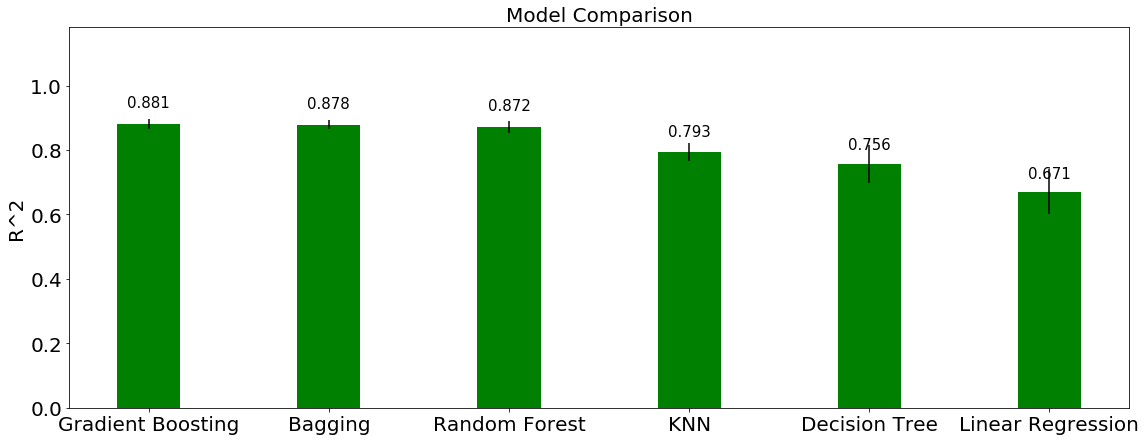

In [13]:

r2_sorted_keys = sorted(r2_list, key=r2_list.get, reverse=True)

r21_list = {}
for i in range(len(r2_sorted_keys)):
    key = r2_sorted_keys[i]
    r21_list[key] = r2_list[key]

N = len(r21_list.values())

r21_values = np.array(list(r21_list.values()))
x = r21_values[:, 0]


ind = np.arange(N)  # the x locations for the groups
width = 0.35      # the width of the bars

fig, ax = plt.subplots(figsize=(19, 7))
#g1 = ax.bar(ind, x, width, color='b')
#g2 = ax.plot(x, 'r')

# add some text for labels, title and axes ticks
ax.set_ylabel('R^2', fontsize=20)
ax.set_title('Model Comparison', fontsize=20)
ax.set_xticks(ind) # + width / 2)
ax.set_xticklabels(list(r21_list.keys())) 
ax.tick_params(labelsize=20)

rects1 = ax.bar(np.arange(N), r21_values[:,0], width=width, color='g', yerr=r21_values[:,1])
autolabel_r2(rects1)

ax.set_ylim([0, max(x) + 0.3])

plt.show()

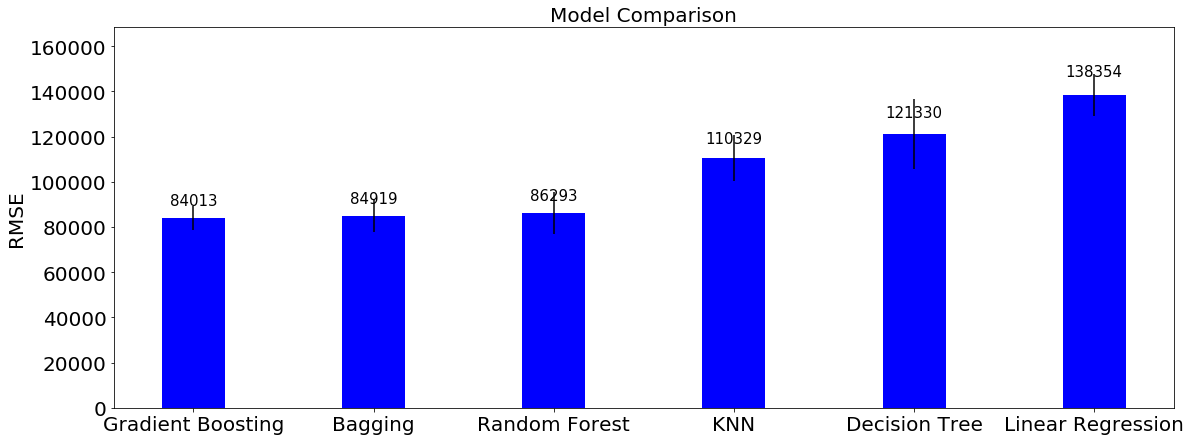

In [14]:
rmse_sorted_keys = sorted(rmse_list, key=rmse_list.get, reverse=False)

rmse1_list = {}
for i in range(len(rmse_sorted_keys)):
    key = rmse_sorted_keys[i]
    rmse1_list[key] = rmse_list[key]

rmse1_values = np.array(list(rmse1_list.values()))
N = len(rmse1_list.values())
x = rmse1_values[:, 0]


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(19, 7))
#g1 = ax.bar(ind, x, width, color='b')
#g2 = ax.plot(x, 'r')
rects1 = ax.bar(np.arange(N), rmse1_values[:, 0], width, color='b', yerr=rmse1_values[:, 1], align='center')
autolabel_rmse(rects1)

# add some text for labels, title and axes ticks
ax.set_ylabel('RMSE', fontsize=20)
ax.set_title('Model Comparison', fontsize=20)
ax.set_xticks(ind) # + width / 2)
ax.set_xticklabels(list(rmse1_list.keys())) 
ax.tick_params(labelsize=20)


ax.set_ylim([0, max(x) + 30000])
plt.show()